In [ ]:
# importing necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#importing dataset
df = pd.read_csv("customer_sales_dataset_800_rows.csv")

In [ ]:
# seeing 1st 5 row using head()
df.head()

,age,monthly_income,tenure_months,avg_session_time,support_tickets,discount_rate,region_code,marketing_score,purchase_frequency,customer_lifetime_value
0,56.0,25365.384650,30.0,52.211140,3.0,0.031454,3.0,58.029834,13.0,24543.536728
1,69.0,53791.698403,18.0,30.436642,4.0,0.093673,5.0,97.621094,1.0,18366.760854
2,46.0,77991.932957,2.0,52.979621,2.0,0.016235,4.0,33.787636,6.0,28648.320546
3,32.0,41051.439515,49.0,5.939565,2.0,0.371676,4.0,48.959010,13.0,20928.004368
4,60.0,NaN,77.0,16.199777,4.0,0.361665,NaN,67.797575,14.0,30102.601527


In [5]:
#seeing dataset shape
df.shape

(800, 10)

In [6]:
#seeing info using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      760 non-null    float64
 1   monthly_income           760 non-null    float64
 2   tenure_months            760 non-null    float64
 3   avg_session_time         760 non-null    float64
 4   support_tickets          760 non-null    float64
 5   discount_rate            760 non-null    float64
 6   region_code              760 non-null    float64
 7   marketing_score          760 non-null    float64
 8   purchase_frequency       760 non-null    float64
 9   customer_lifetime_value  800 non-null    float64
dtypes: float64(10)
memory usage: 62.6 KB


In [7]:
#seeing duplicate value using duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [8]:
#seeing NAN value using isna().sum()
df.isna().sum()

age                        40
monthly_income             40
tenure_months              40
avg_session_time           40
support_tickets            40
discount_rate              40
region_code                40
marketing_score            40
purchase_frequency         40
customer_lifetime_value     0
dtype: int64

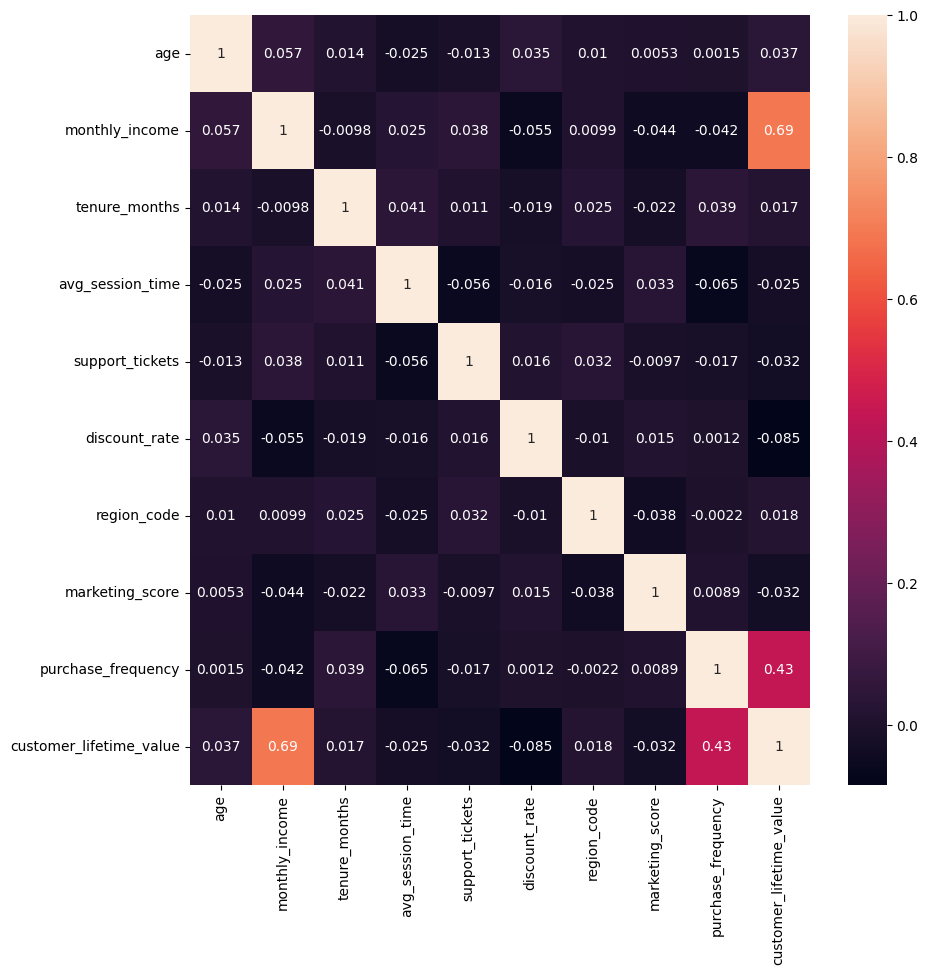

In [10]:
#seeing corelation between columns using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

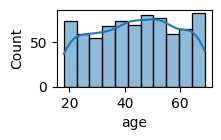

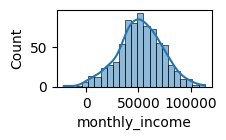

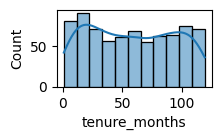

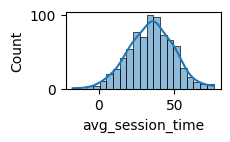

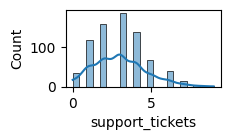

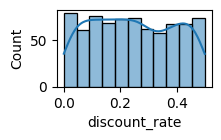

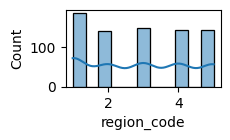

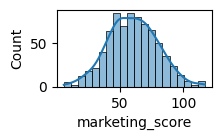

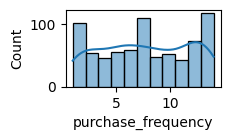

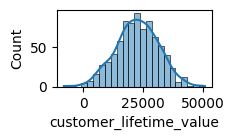

In [13]:
#seeing columns data distribution
for col in df:
    plt.figure(figsize=(2,1))
    sns.histplot(df[col], kde=True)
    plt.show()

In [14]:
df.columns

Index(['age', 'monthly_income', 'tenure_months', 'avg_session_time',
       'support_tickets', 'discount_rate', 'region_code', 'marketing_score',
       'purchase_frequency', 'customer_lifetime_value'],
      dtype='object')

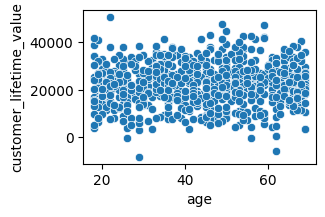

In [16]:
#relation between age and customer lifetime value
plt.figure(figsize=(3,2))
sns.scatterplot(x='age', y='customer_lifetime_value', data=df)
plt.show()

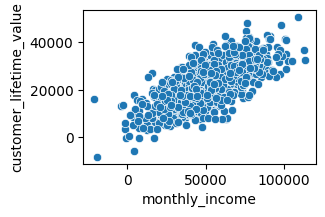

In [17]:
#relation between monthly_income and customer lifetime value
plt.figure(figsize=(3,2))
sns.scatterplot(x='monthly_income', y='customer_lifetime_value', data=df)
plt.show()

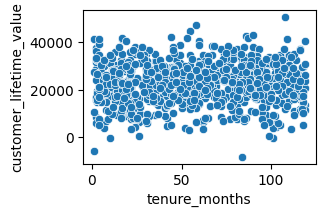

In [18]:
#relation between tenure_months and customer lifetime value
plt.figure(figsize=(3,2))
sns.scatterplot(x='tenure_months', y='customer_lifetime_value', data=df)
plt.show()

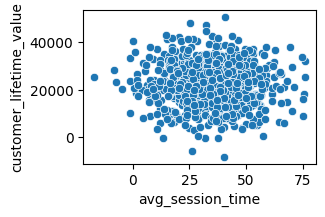

In [19]:
#relation between avg_session_time and customer lifetime value
plt.figure(figsize=(3,2))
sns.scatterplot(x='avg_session_time', y='customer_lifetime_value', data=df)
plt.show()

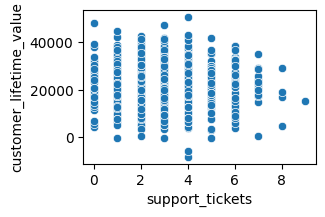

In [20]:
#relation between support_tickets and customer lifetime value
plt.figure(figsize=(3,2))
sns.scatterplot(x='support_tickets', y='customer_lifetime_value', data=df)
plt.show()

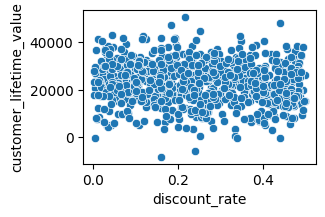

In [21]:
#relation between discount_rate and customer lifetime value
plt.figure(figsize=(3,2))
sns.scatterplot(x='discount_rate', y='customer_lifetime_value', data=df)
plt.show()

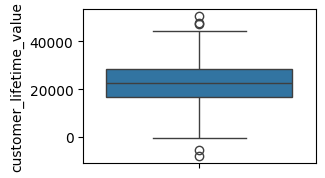

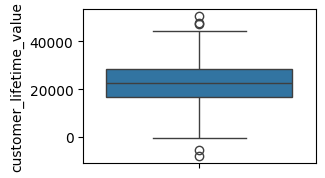

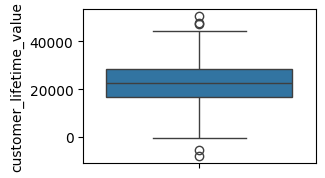

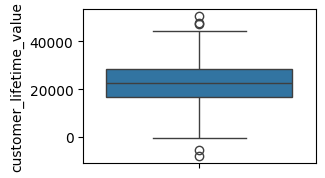

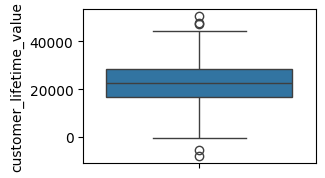

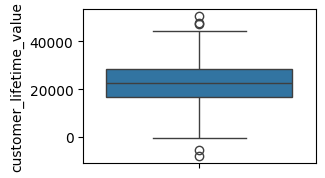

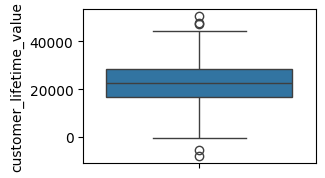

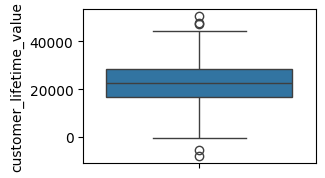

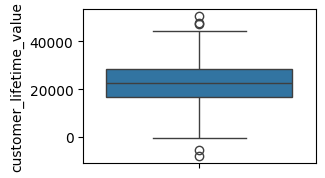

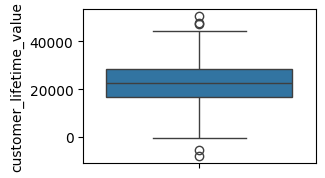

In [23]:
#using boxplot for seeing outlier
for col2 in df:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col])
    plt.show()

In [24]:
#removing outlier using z score
def outlier1(df, col3):
    mean_val = df[col3].mean()
    std_val = df[col3].std()

    z_score = (df[col3] - mean_val) / std_val

    return df[(z_score >= -3) & (z_score <= 3)]

In [25]:
sel_columns = df.drop(['customer_lifetime_value'], axis=1)

In [27]:
df_clean = df.copy()

In [28]:
for col4 in sel_columns:
    df_clean = outlier1(df_clean, col4)

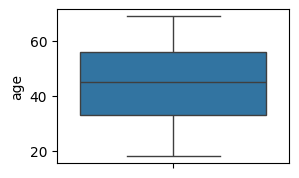

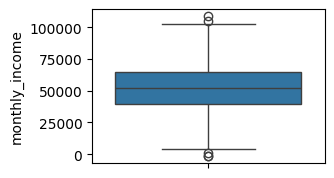

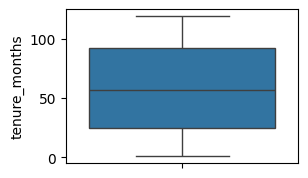

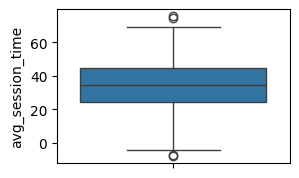

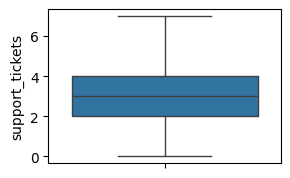

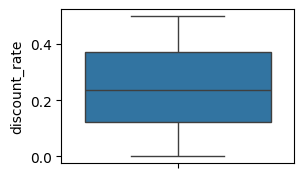

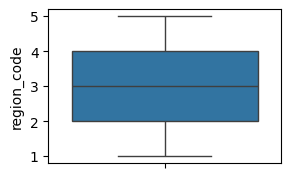

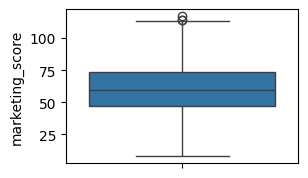

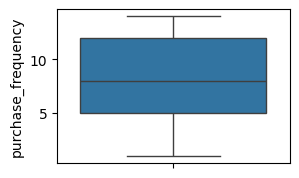

In [30]:
for col5 in sel_columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(df_clean[col5])
    plt.show()